<a href="https://colab.research.google.com/github/ksy-20908/30603-/blob/main/30603_%EA%B9%80%EC%8A%B9%EC%97%B0_%EA%B3%B5%EA%B0%84_%EB%B2%A1%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%B0%8F_%EA%B0%92_%EA%B5%AC%ED%95%98%EA%B8%B0%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시작 좌표를 입력해 주세요(양수만 입력)
X좌표: 100
Y좌표: 100
Z좌표: 100
끝 좌표를 입력해 주세요(시작 좌표보다 크게 넣어주세요)
X좌표: 255
Y좌표: 255
Z좌표: 255
공간 벡터 값은268.46787517317597


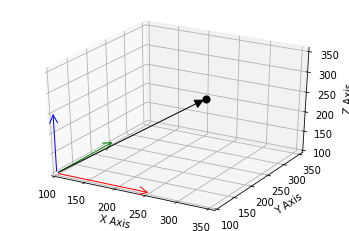

In [ ]:
# 3차원 공간 만들기(오픈 소스)
from matplotlib import pyplot as plt

# 3차원 공간에 화살표 스타일을 사용하여 화살표 시각화
from matplotlib.patches import FancyArrowPatch

# 3차원 공간 도구 가져오기
from mpl_toolkits.mplot3d import proj3d

# 수치 계산을 정확하게 하기 위해 numpy 사용
import numpy as np

# 벡터를 시각화 할때 잘 알아 보기 위한 화살표 함수 정의 
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# 공간 벡터 그리는 함수 정의  
def drawVector(fig, pointA, pointB, **kwargs):
	ms = kwargs.get('mutation_scale', 20)
	ars = kwargs.get('arrowstyle', '-|>')
	lc = kwargs.get('lineColor', 'k')
	pc = kwargs.get('projColor', 'k')
	pointEnable = kwargs.get('pointEnable', True)
	projOn = kwargs.get('proj', True)

	if pointA.size == 3:
		xs = [pointA[0], pointB[0]]
		ys = [pointA[1], pointB[1]]
		zs = [pointA[2], pointB[2]]
	else:
		xs = [pointA[0,3], pointB[0,3]]
		ys = [pointA[1,3], pointB[1,3]]
		zs = [pointA[2,3], pointB[2,3]]

	out = Arrow3D(xs, ys, zs, mutation_scale=ms, arrowstyle=ars, color=lc)
	fig.add_artist(out)

	if pointEnable: fig.scatter(xs[1], ys[1], zs[1], color='k', s=50)



		
# 각 축의 벡터를 시각화
def drawPointWithAxis(fig, *args, **kwargs):
	ms = kwargs.get('mutation_scale', 20)
	ars = kwargs.get('arrowstyle', '->')
	pointEnable = kwargs.get('pointEnable', True)
	axisEnable = kwargs.get('axisEnable', True)

	if len(args) == 4:
		ORG = args[0]
		hat_X = args[1]
		hat_Y = args[2]
		hat_Z = args[3]
		xs_n = [ORG[0], ORG[0] + hat_X[0]]
		ys_n = [ORG[1], ORG[1] + hat_X[1]]
		zs_n = [ORG[2], ORG[2] + hat_X[2]]
		xs_o = [ORG[0], ORG[0] + hat_Y[0]]
		ys_o = [ORG[1], ORG[1] + hat_Y[1]]
		zs_o = [ORG[2], ORG[2] + hat_Y[2]]
		xs_a = [ORG[0], ORG[0] + hat_Z[0]]
		ys_a = [ORG[1], ORG[1] + hat_Z[1]]
		zs_a = [ORG[2], ORG[2] + hat_Z[2]]
	else:
		tmp = args[0]
		ORG = tmp[:3,3:]
		hat_X = tmp[:3,0:1]
		hat_Y = tmp[:3,1:2]
		hat_Z = tmp[:3,2:3]
		xs_n = [ORG[0, 0], ORG[0, 0] + hat_X[0, 0]]
		ys_n = [ORG[1, 0], ORG[1, 0] + hat_X[1, 0]]
		zs_n = [ORG[2, 0], ORG[2, 0] + hat_X[2, 0]]
		xs_o = [ORG[0, 0], ORG[0, 0] + hat_Y[0, 0]]
		ys_o = [ORG[1, 0], ORG[1, 0] + hat_Y[1, 0]]
		zs_o = [ORG[2, 0], ORG[2, 0] + hat_Y[2, 0]]
		xs_a = [ORG[0, 0], ORG[0, 0] + hat_Z[0, 0]]
		ys_a = [ORG[1, 0], ORG[1, 0] + hat_Z[1, 0]]
		zs_a = [ORG[2, 0], ORG[2, 0] + hat_Z[2, 0]]

	if pointEnable: fig.scatter(xs_n[0], ys_n[0], zs_n[0], color='k', s=50)

	if axisEnable:
		n = Arrow3D(xs_n, ys_n, zs_n, mutation_scale=ms, arrowstyle=ars, color='r')
		o = Arrow3D(xs_o, ys_o, zs_o, mutation_scale=ms, arrowstyle=ars, color='g')
		a = Arrow3D(xs_a, ys_a, zs_a, mutation_scale=ms, arrowstyle=ars, color='b')
		fig.add_artist(n)
		fig.add_artist(o)
		fig.add_artist(a)
    
 
# 이제 좌표랑 그래프 시각화
print('시작 좌표를 입력해 주세요(양수만 입력)')

# 각 좌표 값 넣기
x1=float(input('X좌표: '))
y1=float(input('Y좌표: '))
z1=float(input('Z좌표: '))
P_atA = np.array([x1,y1,z1])

# 이제 좌표랑 그래프 시각화
print('끝 좌표를 입력해 주세요(시작 좌표보다 크게 넣어주세요)')

# 각 좌표 값 넣기
x2=float(input('X좌표: '))
y2=float(input('Y좌표: '))
z2=float(input('Z좌표: '))
P_atA = np.array([x2,y2,z2])

# 공간 벡터 값 구하기
Spacevector=float(((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)**(1/2))

# 공간 벡터 값 출력
print('공간 벡터 값은' f'{Spacevector}')

# 원점 시작
AORG = np.array([x1,y1,z1])

# 각각 벡터의 끝점
hat_X_atA = np.array([x2-x1,0,0])
hat_Y_atA = np.array([0,y2-y1,0])
hat_Z_atA = np.array([0,0,z2-z1])

# 각각의 캔버스에 나눠서 출력
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 축의 벡터들과 공간 벡터를 화살표로 시각화
drawPointWithAxis(ax, AORG, hat_X_atA, hat_Y_atA, hat_Z_atA, pointEnable=False)
drawVector(ax, AORG, P_atA, arrowstyle='-|>')

# 3차원 공간에서 각 축의 숫자와 이름 표현
ax.set_xlim([x1-0.1,x1+x2]), ax.set_ylim([y1-0.1,y1+y2]), ax.set_zlim([z1-0.1,z1+z2])
ax.set_xlabel('X Axis'), ax.set_ylabel('Y Axis'), ax.set_zlabel('Z Axis')

# 각 축의 벡터와 공간 벡터 시각화 
plt.show()